In [200]:
n = 15
N = (n + 4 ) % 5 + 1
print("Номер варіанту", N)
list = [2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 
24, 25, 26, 27]
print("Вправи: ", list)

Номер варіанту 5
Вправи:  [2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27]


### **2. Вивести останні 8 рядків набору даних.**

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\sanch\NationalNames.csv")
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### ** 4. Отримайте загальну інформацію про дані у наборі даних. **

In [205]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### ** 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних. **

In [207]:
FC = df[df['Gender'] == 'F']['Name'].nunique()
MC = df[df['Gender'] == 'M']['Name'].nunique()
number_of_names = pd.DataFrame({
    'Gender' : ['F', 'M'],
    'Name': [FC, MC]})
number_of_names = number_of_names.set_index('Gender')
number_of_names

,Name
Gender,
F,64911
M,39199


### ** 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.  **

In [209]:
top_5_names = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]
top_5_names = top_5_names.sort_values(by = 'Count', ascending = False).head(5)
top_5_names

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### ** 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі. **

In [213]:
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
min_count_records

254615

### ** 10. Підрахуйте кількість унікальних імен у кожному році. **

In [215]:
unique = df.groupby('Year')['Name'].nunique().reset_index()
unique = unique.set_index('Year')
unique

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


### ** 15. Знайдіть загальну кількість народжень за рік. **

In [218]:
birth = df.groupby('Year').agg({'Count': 'sum'})
birth

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


### ** 16. Знайдіть рік, коли народилося найбільше дітей. **

In [221]:
max_births_year = birth['Count'].idxmax()
max_births_year

1957

### ** 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року. **

In [224]:
numbers_of_each_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
numbers_of_each_year

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


### ** 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків. **

In [227]:
more_F = numbers_of_each_year['F'] > numbers_of_each_year['M']
Years = more_F.sum()
Years

54

### ** 20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців). **

In [231]:
similar_names = df.groupby('Name')['Gender'].nunique()
neutral_names_count = (similar_names == 2).sum()
neutral_names_count

10221

### ** 21. Порахуйте, скільки разів хлопчиків називали Barbara. **

In [234]:
barbara_for_boys = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
barbara_for_boys

4139

### ** 22. Підрахуйте скільки років проводилось спостереження. **

In [359]:
sum_of_years = df['Year'].nunique()
sum_of_years

135

### ** 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року.) **

In [373]:
# Загальна кількість років у наборі даних
total_years = df['Year'].nunique()

# Знаходимо імена, які використовуються і для хлопчиків, і для дівчаток
neutral_names = df.groupby('Name')['Gender'].nunique()
neutral_names = neutral_names[neutral_names == 2].index

# Відбираємо тільки імена, що присутні в кожному році
names_in_all_years = df[df['Name'].isin(neutral_names)]
names_in_all_years = names_in_all_years.groupby('Name')['Year'].nunique()
names_in_all_years = names_in_all_years[names_in_all_years == total_years].index
#print(names_in_all_years)

# Формуємо таблицю з нумерацією
result_df = pd.DataFrame(names_in_all_years, columns=['Name']).reset_index(drop=True)
result_df

,Name


### ** 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів ) **

In [241]:
unpopular_names = df['Name'].value_counts()
rare_names = unpopular_names[unpopular_names < 100]
most_popular_of_unpopular = rare_names.idxmax()
count = rare_names.max()
print(f"Найбільш популярне з непопулярних імен - це {most_popular_of_unpopular}. Їм називали {count} раз.")

Найбільш популярне з непопулярних імен - це Shaye. Їм називали 99 раз.


### ** 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до стат.  **

Text(0, 0.5, 'Count')

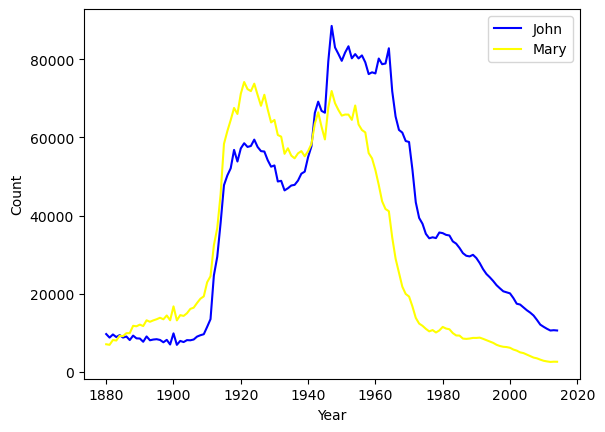

In [244]:
x = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
y = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.plot(x.index, x.values, label = 'John', color = 'blue')
plt.plot(y.index, y.values, label = 'Mary', color = 'yellow')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')

### ** 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках. **

Text(0, 0.5, 'Count')

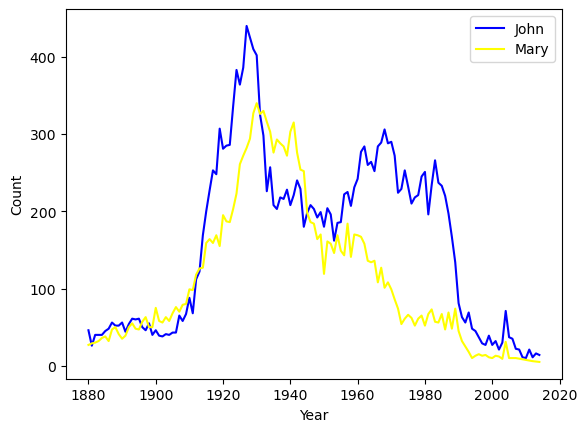

In [246]:
x = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
y = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()


plt.plot(x.index, x.values, label = 'John', color = 'blue')
plt.plot(y.index, y.values, label = 'Mary', color = 'yellow')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')

### ** 27. Знайти найпопулярніші імена в кожному році. **

In [250]:
popular_indices = df.groupby('Year')['Count'].idxmax()
popular = df.loc[popular_indices, ['Year', 'Name', 'Count']]
popular = popular.set_index('Year')
popular

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267


In [269]:
ins = df[df['Name'] == 'John']
#df[['Name', 'Count']]
ins

,Id,Name,Year,Gender,Count
228,229,John,1880,F,46
942,943,John,1880,M,9655
2312,2313,John,1881,F,26
2938,2939,John,1881,M,8769
4212,4213,John,1882,F,40
...,...,...,...,...,...
1744997,1744998,John,2012,M,10593
1766701,1766702,John,2013,F,16
1778403,1778404,John,2013,M,10670
1800575,1800576,John,2014,F,14


In [301]:
#11. Знайдіть рік із найбільшою кількістю унікальних імен.
unique = df.groupby('Year')['Name'].nunique()
year = unique.idxmax()
year

2008

In [343]:
#12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
data_in_max_year = df[df['Year'] == year]

# Крок 3: Знаходимо найпопулярніше ім'я в цьому році (з найбільшою кількістю народжень)
most_popular_name = data_in_max_year.loc[data_in_max_year['Count'].idxmax()]
most_popular_name['Name']

'Jacob'